<a href="https://colab.research.google.com/github/Swapn2/Data-Science-Learnings/blob/main/pandas_case_study_textual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('/content/IMDB Dataset.csv')

In [6]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
df.duplicated().sum()

np.int64(418)

In [9]:
df = df.drop_duplicates()

In [10]:
df = df.iloc[:10000]

In [11]:
# lowercase
df['review'] = df['review'].str.lower()

In [12]:
# removing leading and trailing spaces
df['review'] = df['review'].str.strip()

In [13]:
# removing HTML tags
# we will use regx for this
# remove html tags

import re
def remove_html(data):
    data=re.sub(r'<.*?>','',data)
    return data

In [14]:
df['review'].apply(remove_html)

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is..."
...,...
10012,i was pleasantly surprised to find that how to...
10013,this is a very moving film that takes a new tw...
10014,apart from the beautiful imagery thanks to new...
10015,this is a perfect series for family viewing. w...


In [15]:
# method 2
df['review'] = df['review'].str.replace(r'<.*?>','',regex = True)

In [16]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [17]:
# removing url
# remove urls

def remove_url(data):
    data=re.sub(r"https?/://\S+|www\.\S+",'',data)
    return data

In [18]:
df['review'].apply(remove_url)

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is..."
...,...
10012,i was pleasantly surprised to find that how to...
10013,this is a very moving film that takes a new tw...
10014,apart from the beautiful imagery thanks to new...
10015,this is a perfect series for family viewing. w...


In [19]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [20]:
# searching of url in the comment
df[df['review'].str.contains(r"https?://\S+|www\.\S+",'',regex = True)].iloc[0].values


array(['mario lewis of the competitive enterprise institute has written a definitive 120-page point-by-point, line-by-line refutation of this mendacious film, which should be titled a convenient lie. the website address where his debunking report, which is titled "a skeptic\'s guide to an inconvenient truth" can be found at is :www.cei.org. a shorter 10-page version can be found at: www.cei.org/pdf/5539.pdf once you read those demolitions, you\'ll realize that alleged "global warming" is no more real or dangerous than the y2k scare of 1999, which gore also endorsed, as he did the pseudo-scientific film the day after tomorrow, which was based on a book written by alleged ufo abductee whitley strieber. as james "the amazing" randi does to psychics, and philip klass does to ufos, and gerald posner does to jfk conspir-idiocy theories, so does mario lewis does to al gore\'s movie and the whole "global warming" scam.',
       'negative'], dtype=object)

In [21]:
# method 2
df['review'] = df['review'].str.replace(r"https?://\S+|www\.\S+",'',regex = True)

In [22]:
# expanding abbrevation

def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)
    data = re.sub(r"donå«t", "do not", data)

    return data

In [23]:
df['review'] = df['review'].apply(remove_abb)

In [24]:
from textblob import TextBlob

In [25]:
text = "Hi can dive at nigt"
TextBlob(text).correct().string

'I can dive at night'

In [26]:
def spelling_correction(text):
  return TextBlob(text).correct().string


In [27]:
df['review'] = df['review'].apply(spelling_correction)

KeyboardInterrupt: 

In [42]:
# punctuation
import string
string.punctuation

def remove_punctuation(text):
  for i in string.punctuation:
    if i in text:
      text = text.replace(i,"")
  return text

In [29]:
df['review'] = df['review'].apply(remove_punctuation)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,petter matteis love in the time of money is a ...,positive


In [45]:
# tokenization
from nltk import ngrams
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [46]:
from nltk.tokenize import word_tokenize

In [47]:
df['tokenized_review'] = df['review'].apply(word_tokenize)

In [48]:
df.head()

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."


In [49]:
# stop word removal
from nltk.corpus import stopwords

In [50]:
import nltk
nltk.download('stopwords')

stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [53]:
def remove_stopwords(text):
  L = []
  for word in text:
    if word not in stopwords.words('english'):
      L.append(word)
  return L


In [54]:
df['tokenized_review'] = df['tokenized_review'].apply(remove_stopwords)

In [55]:
df['review'] = df['tokenized_review'].apply(lambda x:" ".join(x))

In [56]:
df.head()

,review,sentiment,tokenized_review
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,..."
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,..."


In [57]:
df['char_length'] = df['review'].str.len()


In [58]:
df.head()

,review,sentiment,tokenized_review,char_length
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",1142
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",656
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",592
3,basically family little boy jake thinks zombie...,negative,"[basically, family, little, boy, jake, thinks,...",440
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",863


In [60]:
df['word_length'] = df['tokenized_review'].apply(len)


In [61]:
import seaborn as sns

<ipython-input-62-48780d6d733e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['char_length'])


<Axes: xlabel='char_length', ylabel='Density'>

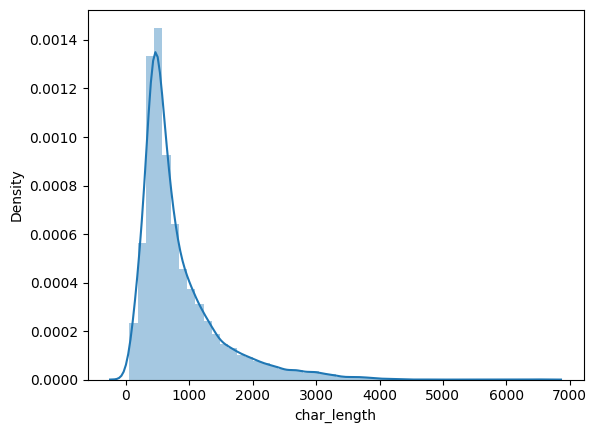

In [62]:
sns.distplot(df['char_length'])

<ipython-input-63-189a92809fbb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment'] == 'positive']['char_length'])
<ipython-input-63-189a92809fbb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sentiment'] == 'negative']['char_length'])


<Axes: xlabel='char_length', ylabel='Density'>

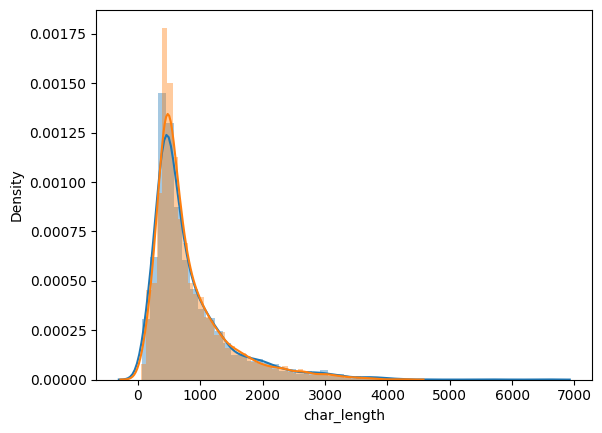

In [63]:
sns.distplot(df[df['sentiment'] == 'positive']['char_length'])
sns.distplot(df[df['sentiment'] == 'negative']['char_length'])

In [64]:
from nltk import ngrams

In [65]:
# this will give us a big list
# df['tokenized_review'].sum()

['one',
 'reviewers',
 'mentioned',
 'watching',
 '1',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'methe',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordit',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'manyaryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'moreso',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'awayi',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'go

In [67]:
pd.Series(ngrams(df['tokenized_review'].sum(),3)).value_counts()

,count
"(I, ever, seen)",169
"(worst, movie, ever)",69
"(I, would, like)",56
"(movie, ever, seen)",56
"(one, worst, movies)",55
...,...
"(big, screen, short)",1
"(transfer, big, screen)",1
"(successfully, transfer, big)",1
"(print, successfully, transfer)",1


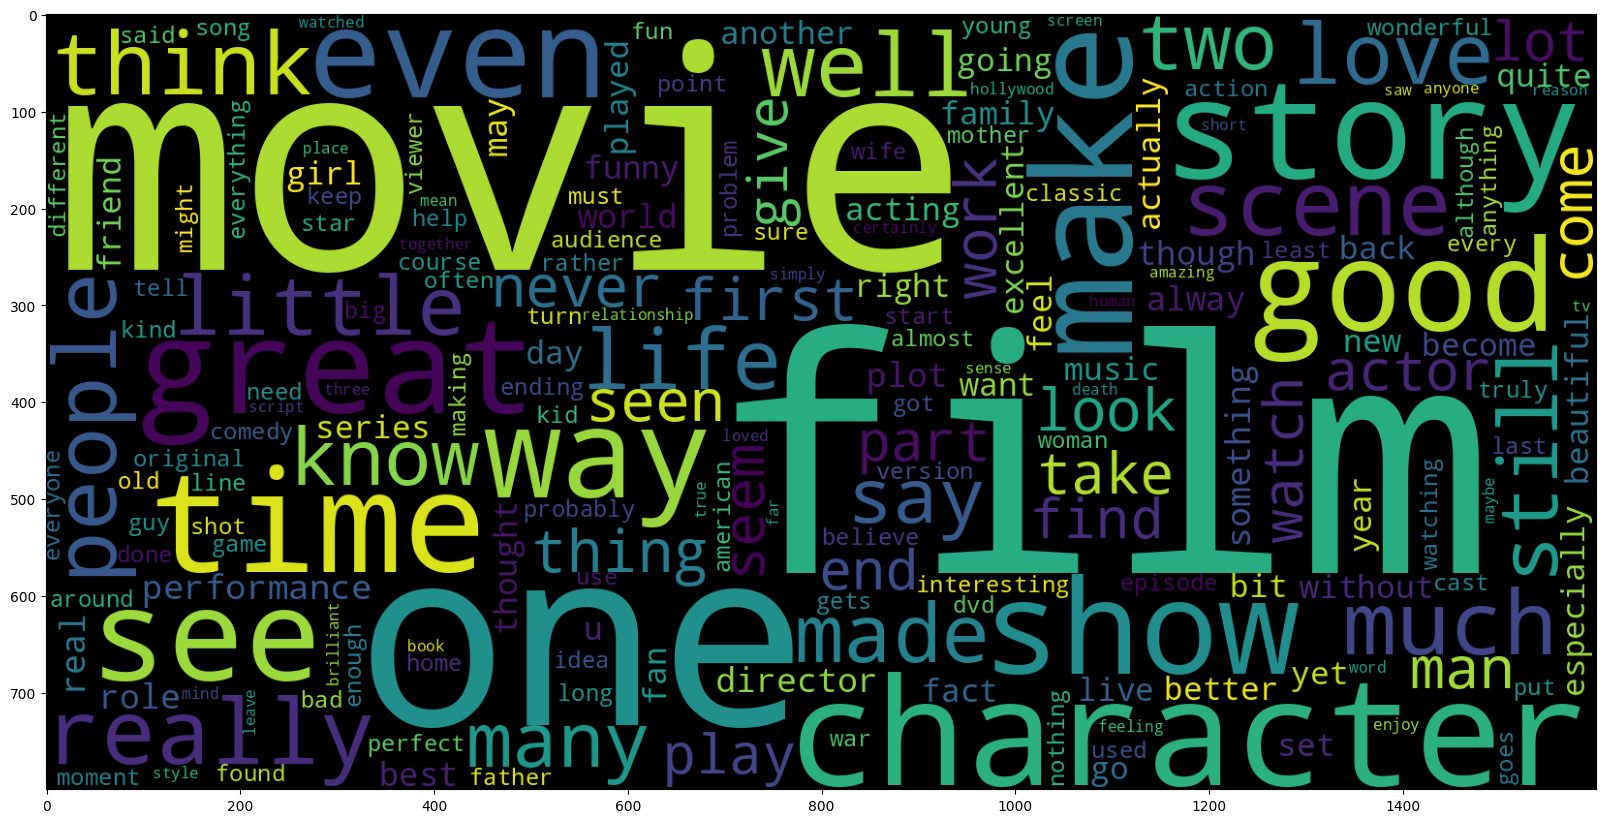

In [68]:
# wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'positive']['review']))
plt.imshow(wc)

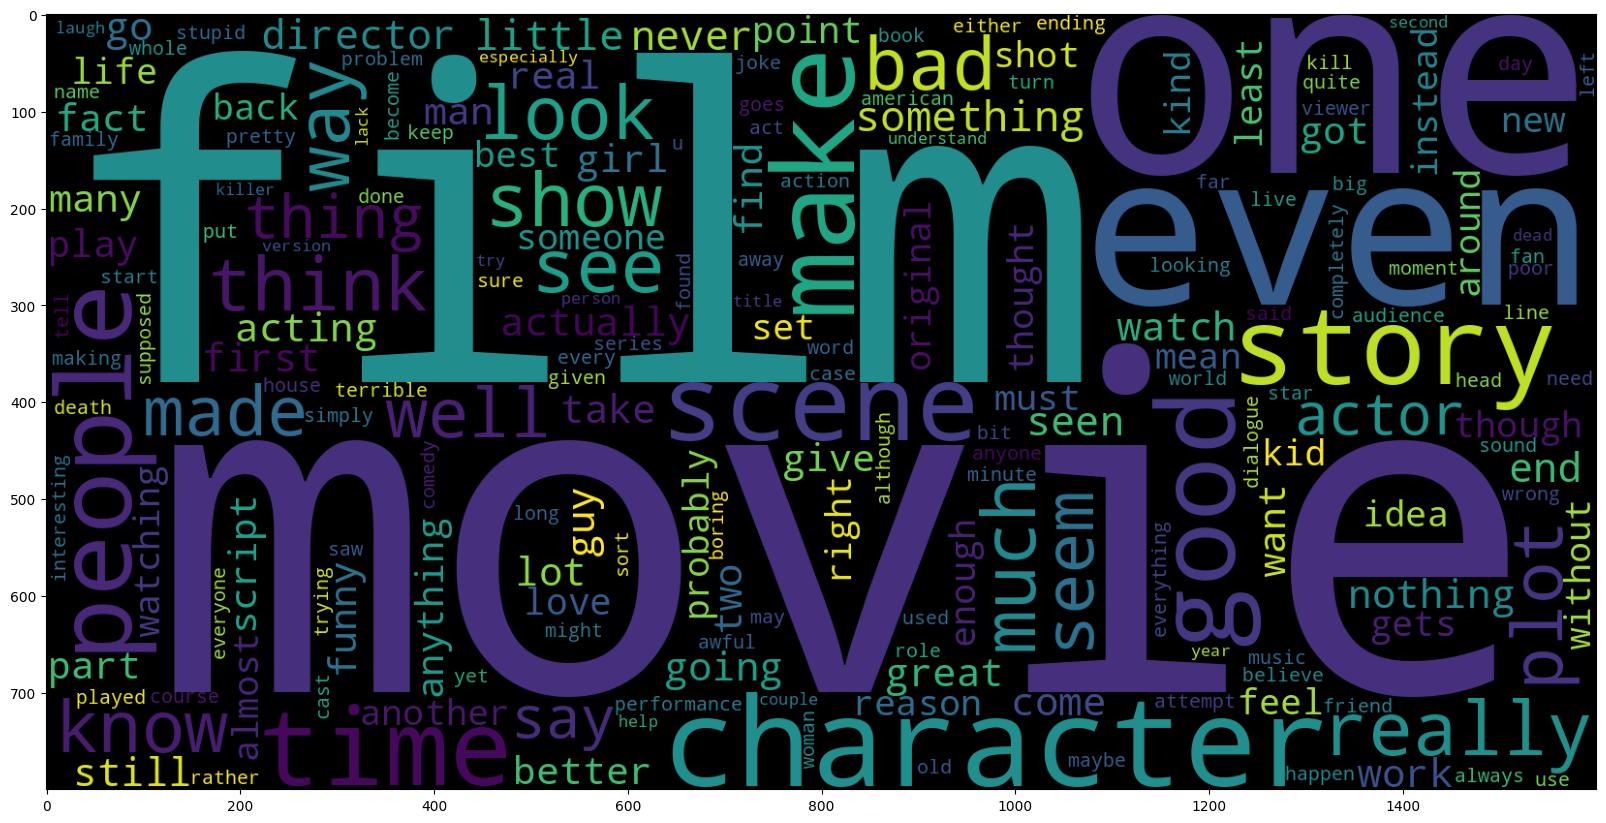

In [69]:
# wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'negative']['review']))
plt.imshow(wc)

In [71]:
# BoW

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000)
bag_of_words = count_vectorizer.fit_transform(df['review'])
# Use get_feature_names_out instead of get_feature_names
bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = count_vectorizer.get_feature_names_out())

In [72]:
bag_of_words

,10,100,1000,1010,11,110,12,13,13th,14,...,york,you,young,younger,youth,youthful,zero,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
